In [1]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import imageio

import radon_monitor

# Calibrator

#### Purpose: Develop a program to help calibrate the frames

### Table of Contents <a name='toc'></a>
1. [Evaluate Current Calibration](#evaluate)
2. [Calibrate](#calibrate)

### Evaluate Current Calibration <a name = 'evaluate'></a>
[Table of Contents](#toc)

In [2]:
rm = radon_monitor.Radon_Monitor()
#print('Days with data = \n',rm.date_path_map['day'].unique())
print('Calibration dates = ',rm.calibrated_dates)

1718 previous radon measurements found
Calibration dates =  ['11/1/2021', '11/20/2021', '11/21/2021', '11/23/2021', '12/11/2021', '12/18/2021', '12/31/2021']


In [4]:
rm.date_path_map

,date,path,day,hour
0,2021-11-04 08:01:00,/Volumes/sambashare/projects/radon_monitor/dat...,11/04/2021,8
1,2021-11-04 08:01:00,/Volumes/sambashare/projects/radon_monitor/dat...,11/04/2021,8
2,2021-11-04 09:02:00,/Volumes/sambashare/projects/radon_monitor/dat...,11/04/2021,9
3,2021-11-04 09:02:00,/Volumes/sambashare/projects/radon_monitor/dat...,11/04/2021,9
4,2021-11-04 10:03:00,/Volumes/sambashare/projects/radon_monitor/dat...,11/04/2021,10
...,...,...,...,...
2725,2022-02-20 06:22:00,/Volumes/sambashare/projects/radon_monitor/dat...,02/20/2022,6
2726,2022-02-20 07:23:00,/Volumes/sambashare/projects/radon_monitor/dat...,02/20/2022,7
2727,2022-02-20 08:24:00,/Volumes/sambashare/projects/radon_monitor/dat...,02/20/2022,8
2728,2022-02-20 09:25:00,/Volumes/sambashare/projects/radon_monitor/dat...,02/20/2022,9


In [5]:
rm.date_path_map['hour'] = rm.date_path_map.date.dt.hour

/Volumes/sambashare/projects/radon_monitor/data/hourly_tests/tests_02-20-2022_1026.png


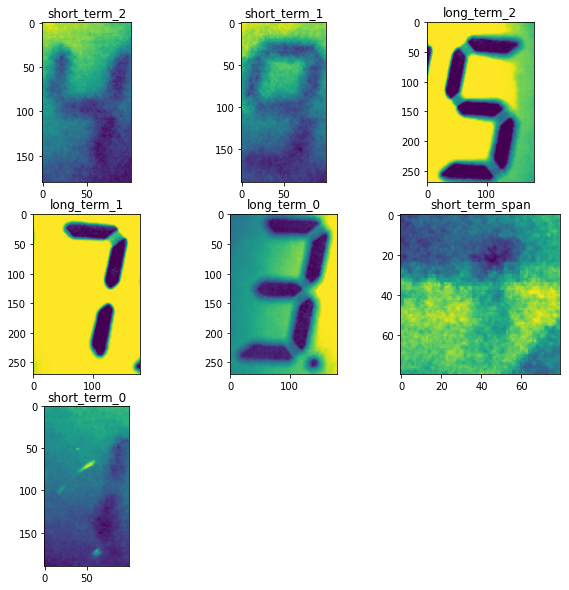

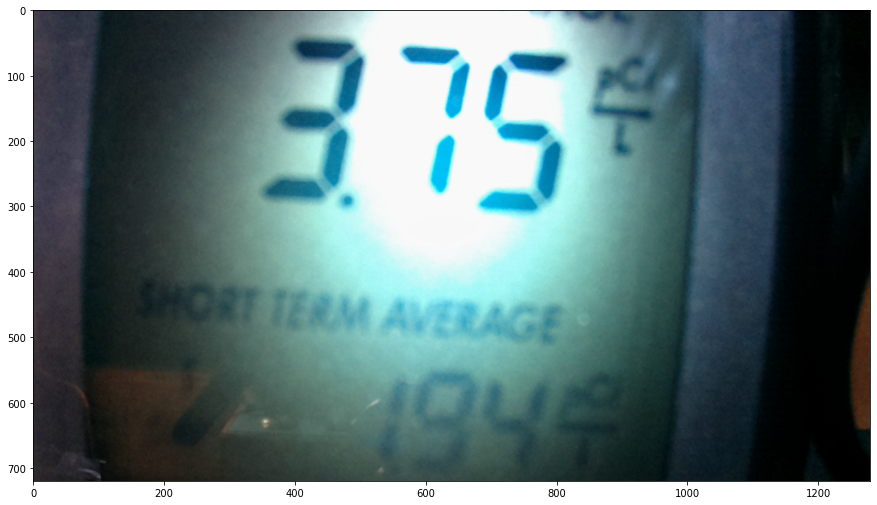

In [4]:
day = '02/20/2022'
hour = 10
hour_mask = rm.date_path_map['hour'] == hour
day_mask = rm.date_path_map['day']==day
if len(rm.date_path_map[day_mask &hour_mask])==0:
    print('No data for that day')
else:
    date_path = rm.date_path_map[day_mask&hour_mask].path.values[0]
    print(date_path)
    rm.cutout_sub(date_path,savefig = True)


### Calibrate <a name = 'calibrate'></a>
[Table of Contents](#toc)

In [61]:
# Prevents accidently initiating calibration
should_continue = eval(input('Ready to calibrate? True/False'))
assert should_continue == True

Ready to calibrate? True/False True


In [175]:
# intilize new calibration dataframe
date = '11/20/2021'

new_calibrated_df = pd.DataFrame({'date':7*[date],
                                  'position':['long_term_0',
                                             'long_term_1',
                                             'long_term_2',
                                             'short_term_0',
                                             'short_term_1',
                                             'short_term_2',
                                             'short_term_span'],
                                 })
new_calibrated_df.index = new_calibrated_df['position']

last calibration coordinates =  {'trow': 540, 'brow': 620, 'lcol': 240, 'rcol': 320}
adjusted calibration coordinates {'trow': 540, 'brow': 620, 'lcol': 240, 'rcol': 320}
/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-20-2021_1545.png


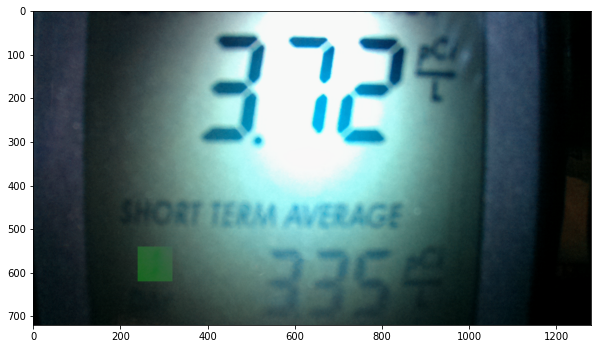

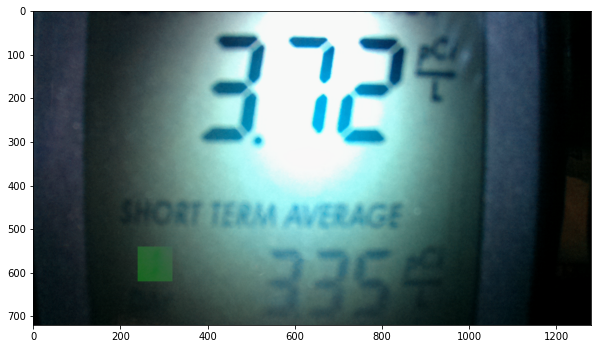

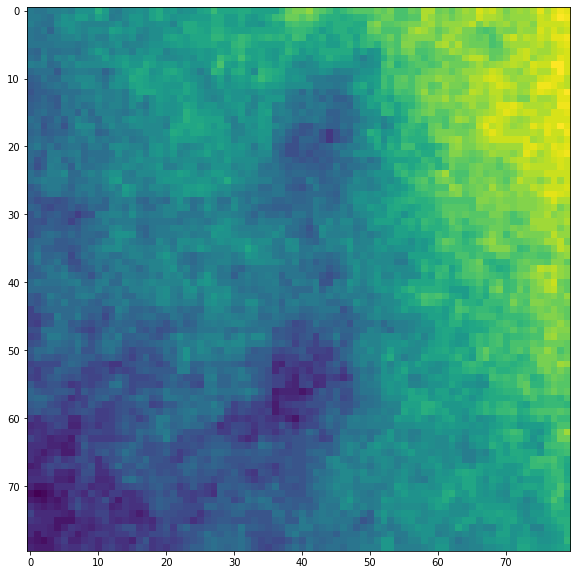

In [182]:

last_cal_day = '11/23/2021' # input (used as a starting point)
position = 'short_term_span'# input
last_cal_day_mask = rm.positions_df['date'] == last_cal_day
position_mask = rm.positions_df['position']==position
last_cal_coords = rm.positions_df[last_cal_day_mask & position_mask].coordinates.iloc[0]



# test with last_cal_coords first then adjust the coords as necessary 
test_coord = rm.coord_shifter(last_cal_coords,'vertical',0)
test_coord = rm.coord_shifter(test_coord,'horizontal',0)

print("last calibration coordinates = ",last_cal_coords)
print('adjusted calibration coordinates',test_coord)
print(date_path)


new_calibrated_df.loc[position,'coordinates'] = str(test_coord)
new_coord = eval(new_calibrated_df.loc[position,'coordinates'])
rm.scope(last_cal_coords,date_path)
rm.scope(new_coord,date_path)
rm.cutout(new_coord,date_path)

In [183]:
new_calibrated_df

,date,position,coordinates
position,,,
long_term_0,11/20/2021,long_term_0,"{'trow': 50, 'brow': 320, 'lcol': 360, 'rcol':..."
long_term_1,11/20/2021,long_term_1,"{'trow': 50, 'brow': 320, 'lcol': 530, 'rcol':..."
long_term_2,11/20/2021,long_term_2,"{'trow': 50, 'brow': 320, 'lcol': 700, 'rcol':..."
short_term_0,11/20/2021,short_term_0,"{'trow': 540, 'brow': 790, 'lcol': 530, 'rcol'..."
short_term_1,11/20/2021,short_term_1,"{'trow': 540, 'brow': 790, 'lcol': 630, 'rcol'..."
short_term_2,11/20/2021,short_term_2,"{'trow': 540, 'brow': 790, 'lcol': 730, 'rcol'..."
short_term_span,11/20/2021,short_term_span,"{'trow': 540, 'brow': 620, 'lcol': 240, 'rcol'..."


In [184]:
# save new coordinates
REFERENCE_DATA_PATH = './reference_data/'
positions_df = pd.read_csv(open(REFERENCE_DATA_PATH+'positions.csv','rb'))
new_calibrated_df = new_calibrated_df.reset_index(drop = True)
positions_df = pd.concat([positions_df,new_calibrated_df])
positions_df.loc[:,'coordinates'] = list(map(lambda x:eval(x),positions_df.coordinates))
#positions_df = positions_df.sort_values(by ='date').reset_index(drop=True)
positions_df.to_csv(REFERENCE_DATA_PATH+'positions.csv')